# Computer Data

In [273]:
import pandas as pd
import numpy as np

In [274]:
import sklearn
import matplotlib.pyplot as plt

In [275]:
df=pd.read_csv('Computer_Data.csv')

In [276]:
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [277]:
df.shape

(6259, 11)

In [278]:
df.corr()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [279]:
b=df.head(1)

In [280]:
df1=pd.get_dummies(df)

In [281]:
y=df1['price']

In [282]:
x=df1.drop(['price'],axis=1)

In [283]:
from sklearn.model_selection import  train_test_split

In [284]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=90)

In [285]:
from sklearn.linear_model import LinearRegression

In [286]:
lreg=LinearRegression()

In [287]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [288]:
lreg.score(X_train,Y_train)

0.7790299854972437

In [289]:
lreg.score(X_test,Y_test)#good fit(no underfitting and no overfitting)

0.7734326427457767

In [290]:
import statsmodels

In [291]:
from statsmodels.formula.api import ols

In [292]:
model=ols('y~x',data=df).fit()

In [293]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     2187.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:58:06   Log-Likelihood:                -44008.
No. Observations:                6259   AIC:                         8.804e+04
Df Residuals:                    6248   BIC:                         8.811e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9484     24.120      3.646      0.000      40.665     135.232
x[0]           0.1150      0.014      7.945      0.000       0.087       0.143
x[1]           9.4166      0.185     51.027      0.000       9.055       9.778
x[2]           0.8073      0.028     29.181      0.000       0.753       0.862
x[3]          47.9645      1.061     45.188      0.000      45.884      50.045
x[4]         122.6323      3.980     30.811      0.000     114.830     130.435
x[5]           0.5450      0.053     10.287      0.000       0.441       0.649
x[6]         -78.5376      3.417    -22.987      0.000     -85.235     -71.840
x[7]          18.8301     12.553      1.500      0.134      -5.778      43.438
x[8]          69.1182     13.380      5.166      0.000      42.888      95.348
x[9]          -8.7286     13.229     -0.660      0.509     -34.661      17.204
x[10]         96.6769     13.431      7.198      0.000      70.348     123.006
x[11]        299.0794     14.290     20.930      0.000     271.067     327.092
x[12]       -211.1311     12.732    -16.582      0.000    -236.091    -186.171
==============================================================================
Omnibus:                     1002.796   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3103.029
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                       6.027   Cond. No.                     1.18e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [294]:
ypred=lreg.predict(X_test)

In [295]:
df.head(1)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1


In [296]:
df1.head(1)

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
0,1,1499,25,80,4,14,94,1,1,0,1,0,0,1


In [297]:
a=np.array([5708,66,730,8,15,132,28,0,1,1,0,0,1])

In [303]:
a= np.atleast_2d(a)

In [304]:
a=lreg.predict(X_test.head(5))

In [302]:
X_test.head(5)

,Unnamed: 0,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
5707,5708,66,730,8,15,132,28,0,1,1,0,0,1
315,316,50,170,4,14,108,4,1,0,1,0,0,1
197,198,33,130,4,14,100,3,1,0,1,0,0,1
349,350,50,170,4,14,108,4,1,0,1,0,0,1
3940,3941,66,540,8,15,273,18,0,1,1,0,0,1


In [211]:
Y_test.head(5),a

(5707    1695
 315     1995
 197     1995
 349     2145
 3940    2165
 Name: price, dtype: int64,
 array([1900.43361425, 2184.73844997, 2052.97527888, 2188.64795644,
        2406.09410305]))

# 50 Startups

In [220]:
df=pd.read_csv("50_Startups.csv")

In [221]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [222]:
df.shape

(50, 5)

In [223]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [224]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


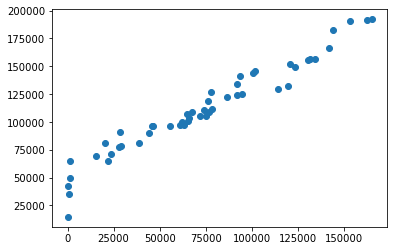

In [226]:
plt.scatter(df['R&D Spend'],df['Profit'])

In [235]:
df1=pd.get_dummies(df)

In [239]:
y=df1['Profit']

In [240]:
x=df1.drop(['Profit'],axis=1)

In [241]:
lreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [242]:
lreg.score(x,y)

0.9507524843355148

In [243]:
import statsmodels

In [244]:
from statsmodels.formula.api import ols

In [249]:
model=ols('y~x',data=df1).fit()

In [250]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           1.34e-27
Time:                        17:51:45   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
x[0]           0.8060      0.046     17.369      0.000       0.712       0.900
x[1]          -0.0270      0.052     -0.517      0.608      -0.132       0.078
x[2]           0.0270      0.017      1.574      0.123      -0.008       0.062
x[3]        1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
x[4]        1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
x[5]        1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [251]:
ypred=lreg.predict(x)

In [255]:
x.head(1)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.2,136897.8,471784.1,0,0,1


In [261]:
a=np.array([165349,136897,471784,0,0,1])

In [266]:
a= np.atleast_2d(a)

In [267]:
lreg.predict(a)

array([192390.42906406])

In [269]:
ypred[0]

192390.57136320975

# Toyota Corolla

In [309]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin-1')

In [310]:
df.shape

(1436, 38)

In [311]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [321]:
df1=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [322]:
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [323]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [324]:
import seaborn as sns

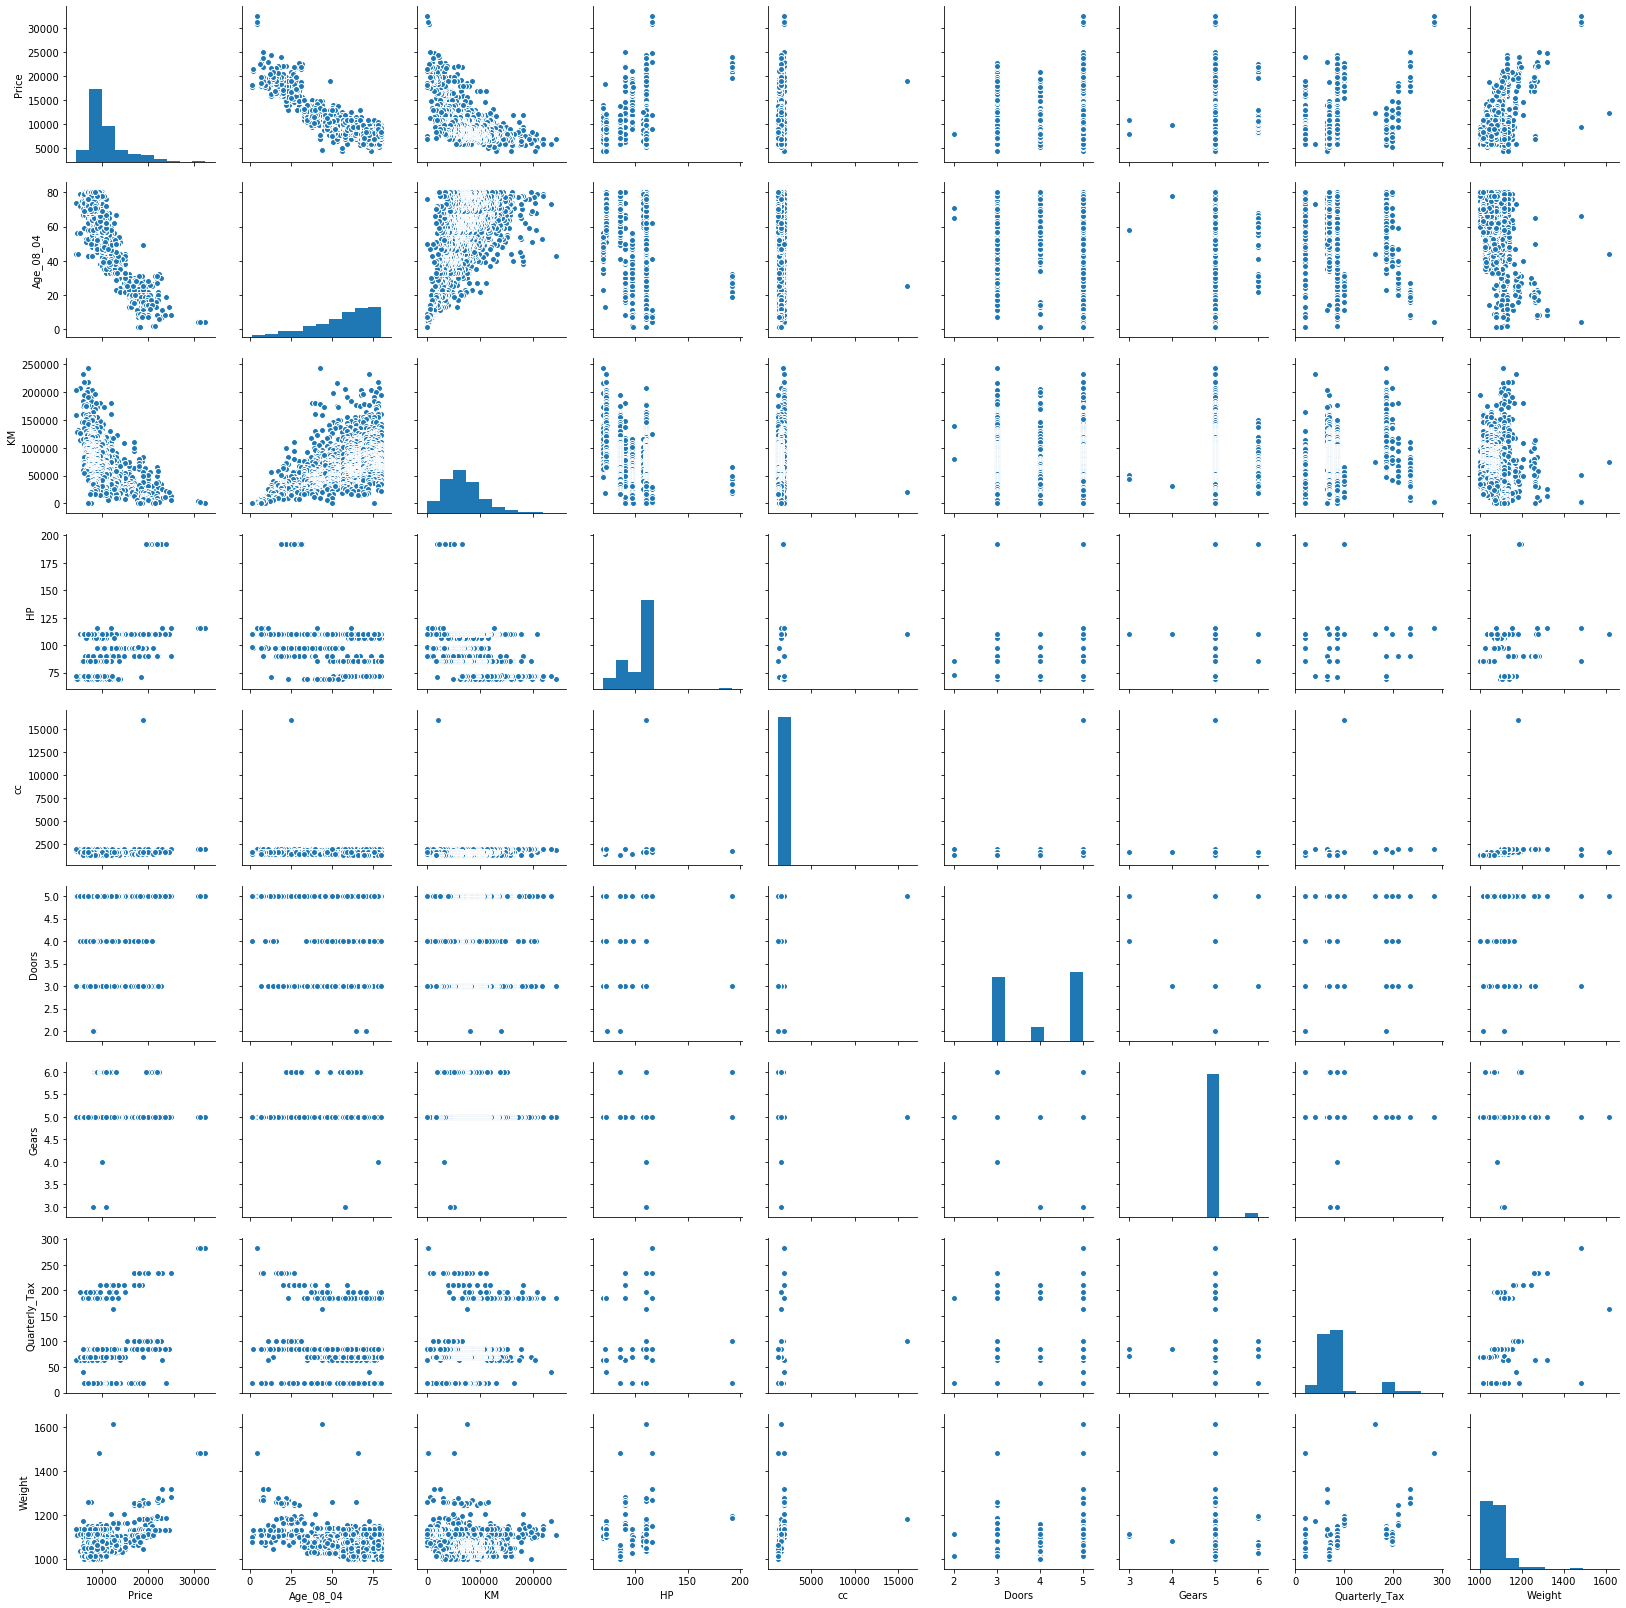

In [326]:
sns.pairplot(data=df1,kind='scatter')

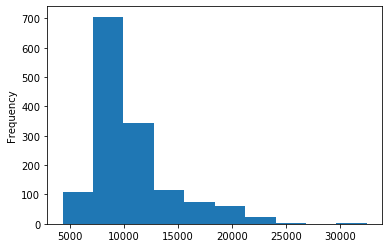

In [335]:
df1['Price'].plot(kind='hist')

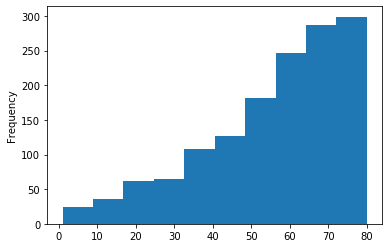

In [336]:
df['Age_08_04'].plot(kind='hist')

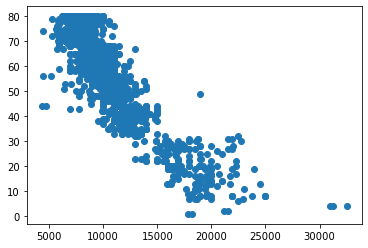

In [338]:
plt.scatter(df['Price'],df['Age_08_04'])

In [340]:
df1.shape

(1436, 9)

In [343]:
df1.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [341]:
from sklearn.model_selection import train_test_split

In [344]:
y=df1['Price']

In [345]:
x=df1.drop(['Price'],axis=1)

In [367]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [368]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [369]:
lreg.score(X_train,Y_train)

0.8651853130740291

In [370]:
lreg.score(X_test,Y_test)

0.85316703468115

In [371]:
model=ols('y~x',data=df1).fit()

In [372]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:26:19   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
x[0]        -121.6584      2.616    -46.512      0.000    -126.789    -116.527
x[1]          -0.0208      0.001    -16.622      0.000      -0.023      -0.018
x[2]          31.6809      2.818     11.241      0.000      26.152      37.209
x[3]          -0.1211      0.090     -1.344      0.179      -0.298       0.056
x[4]          -1.6166     40.006     -0.040      0.968     -80.093      76.859
x[5]         594.3199    197.055      3.016      0.003     207.771     980.869
x[6]           3.9491      1.310      3.015      0.003       1.379       6.519
x[7]          16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""